In [1]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plot

matrix_game_numpy.py


In [2]:
def beautiful_print_vector(s, v, max_width=90):
    fill_symbol = '#'
    string = "{:{fill}{align}{width}}"
    s += ": ["

    for i in range(np.shape(v)[0]):
        s += "{:4f} ; ".format(v[i])

    return string.format(' ' + s[:-3] + "] ",
                         fill=fill_symbol, align='^', width=max_width)


def nash_equilibrium(A):
    n = A.shape[0]
    m = A.shape[1]

    b_ub1, b_ub2 = [-1 for i in range(m)], [1 for i in range(n)]
    bnd1 = [(0, float("inf")) for i in range(m)]
    bnd2 = [(0, float("inf")) for i in range(n)]

    add = abs(A.min())
    A_ub1 = np.transpose(A + add) * (-1)
    A_ub2 = A

    ans1 = linprog(
        c=b_ub2,
        A_ub=A_ub1,
        b_ub=b_ub1,
        bounds=bnd2,
        method="simplex")

    ans2 = linprog(
        c=b_ub1,
        A_ub=A_ub2,
        b_ub=b_ub2,
        bounds=bnd1,
        method="simplex")

    return (ans1.x / abs(ans1.fun),
            ans2.x / abs(ans2.fun), np.array([1 / ans1.fun - add]))

In [3]:
def print_results(read_arr):
    results = nash_equilibrium(read_arr)

    print('#' * 90)
    print(beautiful_print_vector("strategy 1", results[0]))
    print('#' * 90)
    print(beautiful_print_vector("strategy 2", results[1]))
    print('#' * 90)
    print(beautiful_print_vector("Game cost", results[2]))
    print('#' * 90)

    draw(results[0], "Стратегия первого")
    draw(results[1], "Стратегия второго")


def draw(dist, name):
    plot.title(name)
    plot.xlim([0, len(dist) + 1])
    plot.ylim([0, np.max(dist) + 1])
    plot.xlabel('Номер стратегии')
    plot.ylabel('Вероятность')

    for i in range(len(dist)):
        plot.scatter(i + 1, dist[i])
        plot.plot([i + 1, i + 1], [0, dist[i]])

    plot.grid()
    plot.show()

Матрица из примера постановки задачи

<ipython-input-2-67c1f9e70b8e>:25: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans1 = linprog(
<ipython-input-2-67c1f9e70b8e>:32: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans2 = linprog(


##########################################################################################
##### strategy 1: [0.000000 ; 0.129032 ; 0.096774 ; 0.435484 ; 0.338710 ; 0.000000] ######
##########################################################################################
##### strategy 2: [0.000000 ; 0.000000 ; 0.690860 ; 0.145161 ; 0.147849 ; 0.016129] ######
##########################################################################################
################################# Game cost: [4.870968] ##################################
##########################################################################################


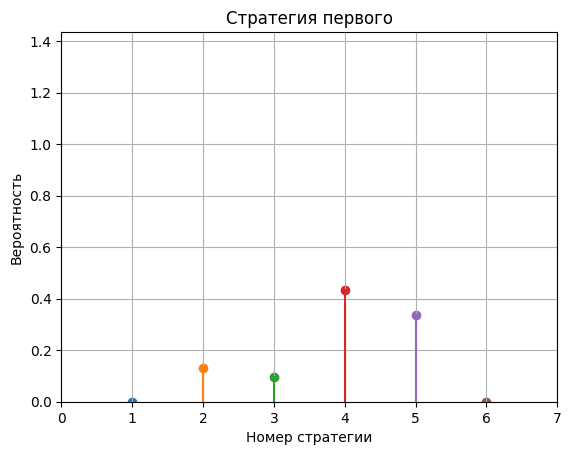

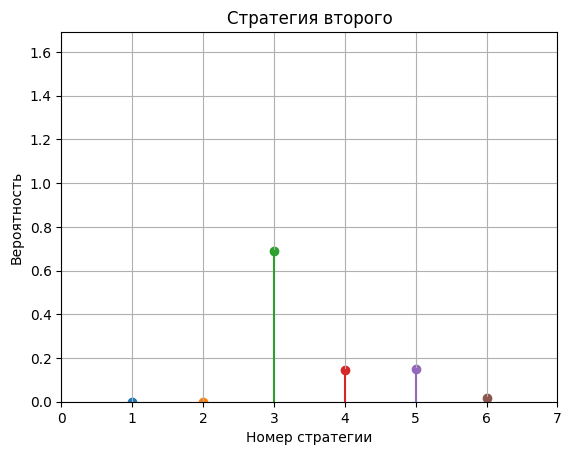

In [4]:
matrix = [[4, 0, 6, 2, 2, 1],
         [3, 8, 4, 10, 4, 4],
         [1, 2, 6, 5, 0, 0],
         [6, 6, 4, 4, 10, 3],
         [10, 4, 6, 4, 0, 9],
         [10, 7, 0, 7, 9, 8]]

print_results(np.array(matrix))

1) Cпектр оптимальной стратегии состоит из одной точки (существует равновесие Нэша в чистых стратегиях)

<ipython-input-2-67c1f9e70b8e>:25: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans1 = linprog(
<ipython-input-2-67c1f9e70b8e>:32: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans2 = linprog(


##########################################################################################
################ strategy 1: [0.000000 ; 1.000000 ; 0.000000 ; 0.000000] #################
##########################################################################################
###################### strategy 2: [0.000000 ; 0.000000 ; 1.000000] ######################
##########################################################################################
################################# Game cost: [1.000000] ##################################
##########################################################################################


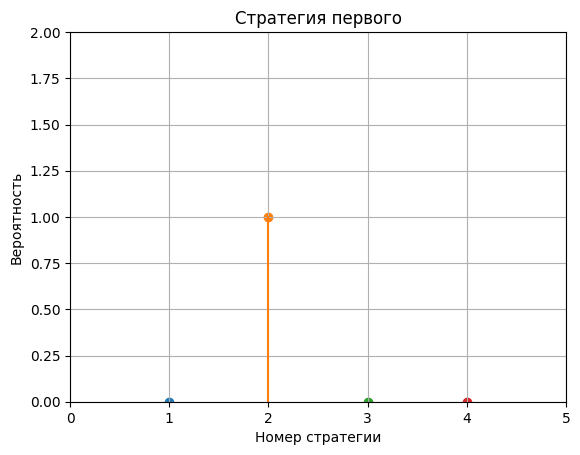

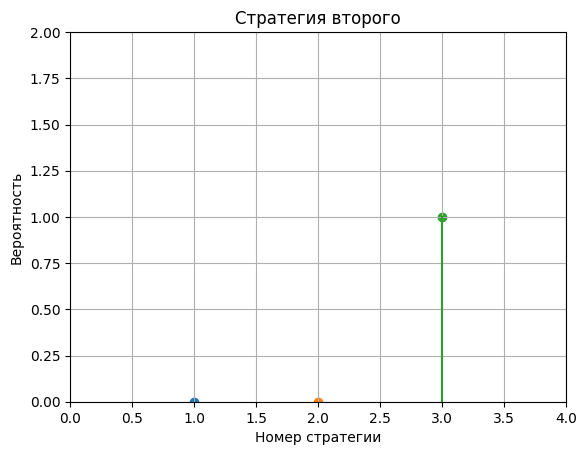

In [5]:
matrix = [[0, 3, 0],
          [2, 10, 1],
          [2, -6, 0],
          [-1, 4, 0]]

print_results(np.array(matrix))

2) Cпектр оптимальной стратегии неполон (т.е. некоторые чистые стратегии не используются)

<ipython-input-2-67c1f9e70b8e>:25: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans1 = linprog(
<ipython-input-2-67c1f9e70b8e>:32: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans2 = linprog(


##########################################################################################
################ strategy 1: [0.714286 ; 0.285714 ; 0.000000 ; 0.000000] #################
##########################################################################################
###################### strategy 2: [0.571429 ; 0.000000 ; 0.428571] ######################
##########################################################################################
################################# Game cost: [17.142857] #################################
##########################################################################################


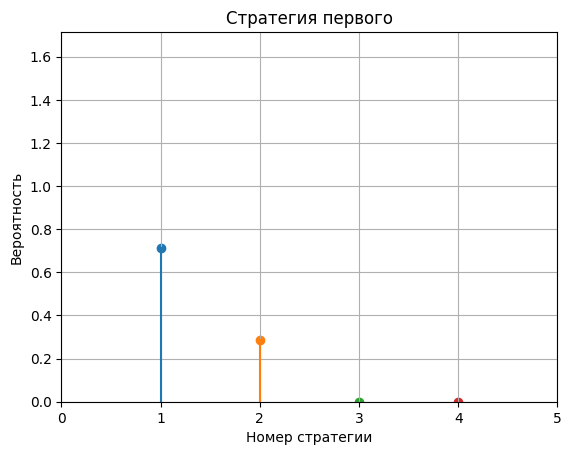

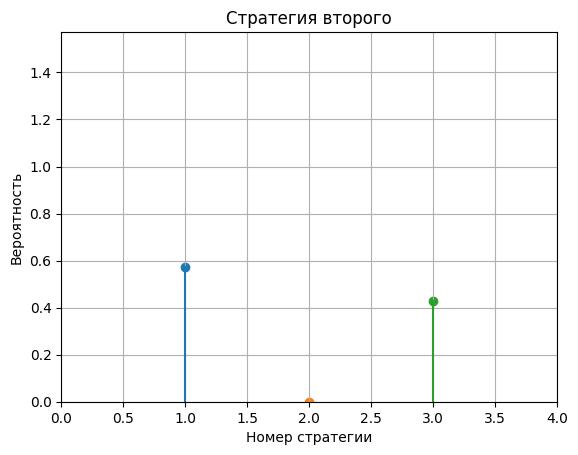

In [6]:
matrix = [[24, 32, 8],
          [0, 16, 40],
          [16, -24, 0],
          [0, 24, 0]]

print_results(np.array(matrix))

3) Cпектр оптимальной стратегии полон

<ipython-input-2-67c1f9e70b8e>:25: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans1 = linprog(
<ipython-input-2-67c1f9e70b8e>:32: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans2 = linprog(


##########################################################################################
###################### strategy 1: [0.222222 ; 0.555556 ; 0.222222] ######################
##########################################################################################
###################### strategy 2: [0.555556 ; 0.222222 ; 0.222222] ######################
##########################################################################################
################################# Game cost: [4.555556] ##################################
##########################################################################################


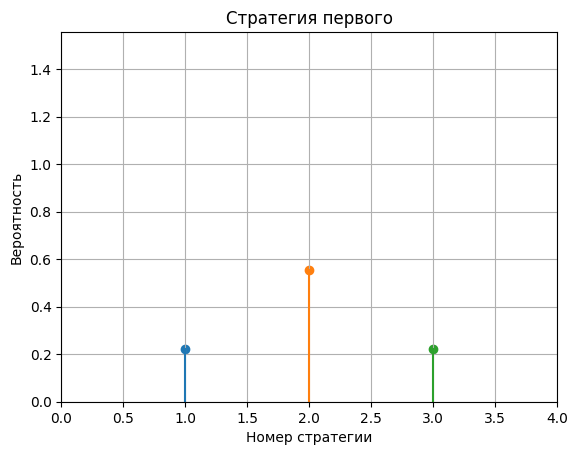

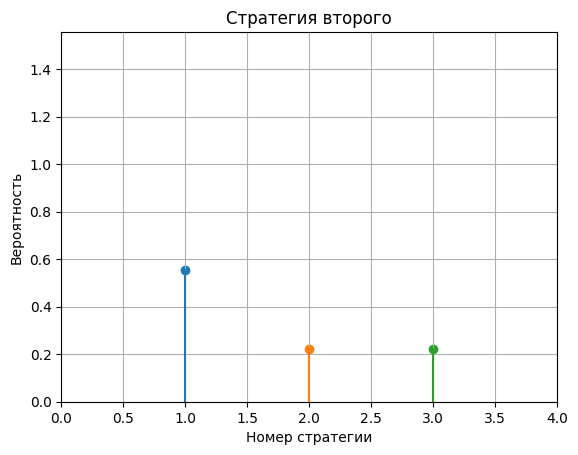

In [7]:
matrix = [[5, 5, 3],
          [5, 3, 5],
          [3, 8, 5]]

print_results(np.array(matrix))